In [5]:
import pandas as pd

df= pd.read_excel('Iris.xlsx')

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#to avoid graph popup

In [7]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [19]:
!pip install scikit-learn --quiet

from sklearn.cluster import KMeans

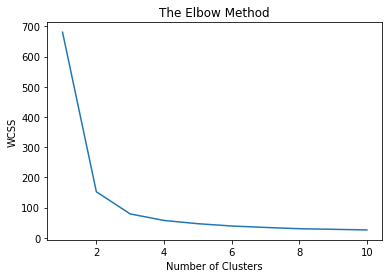

In [27]:
#determining k i.e optimum number of clusters

x = df.iloc[:, [ 1, 2 , 3, 4]].values

wcss=[]  #within cluster sum of squares

for i in range(1, 11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init =10,random_state = 0)
    
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    #plotting the results
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show();
    

#the drop in sum of squares stops decreasing significantly after 3 number of clusters
#hence we assume value of k as 3




In [28]:
#applying k means again with the theoritical value of k

kmeans= KMeans(n_clusters = 3, init = 'k-means++',
              max_iter = 300, n_init = 10, random_state = 0)

y_kmeans= kmeans.fit_predict(x)

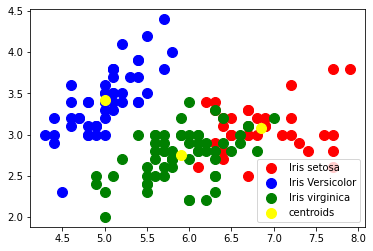

In [45]:
#plotting the clusters according to the first two columns of the dataset

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'Iris Versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c ='green', label = 'Iris virginica')

# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c= 'yellow', label = 'centroids')

plt.legend();